In [1]:
def beta(u, v):
    '''Takes in two 2n dimensional vectors over F_2, and outputs a 0 or 1.'''
    
    if len(u) != len(v) or len(u) % 2 != 0: 
        raise Exception('Input vectors need to have equal and even dimension.')
    
    B = 0
    for i in range(0, len(u), 2): 
        B += u[i] * v[i + 1] - u[i + 1] * v[i]
    
    return B


def conlon_ferber(n):
    '''Returns the Conlon-Ferber graph on F_2^n - {0}'''
    
    if n % 2 != 0:
        raise Exception('Conlon-Ferber graph must be defined on an even dimension.')

    V = list(VectorSpace(GF(2), n))
    V.remove(vector(GF(2), [0] * n))

    for vec in V: vec.set_immutable()
   
    Vectors_e = [x for i,x in enumerate(V)]

    for i in range(len(Vectors_e)):
        print("Vector ", i, " : ", Vectors_e[i])

    
        
    return Graph([V, lambda u, v: beta(u, v) == 1], loops = False)

 
# given a vector, return the index number

def return_index(v):
    for i in range(len(Vertex)):
        if Vertex[i] == v:
            return i
        



In [2]:
from sage.graphs.independent_sets import IndependentSets

G = conlon_ferber(8)
G.vertices()

Vertex = [x for i,x in enumerate(G.vertices())]

Im = IndependentSets(G, maximal=True)
maximals = [x for i,x in enumerate(Im)]


Vector  0  :  (1, 0, 0, 0, 0, 0, 0, 0)
Vector  1  :  (0, 1, 0, 0, 0, 0, 0, 0)
Vector  2  :  (1, 1, 0, 0, 0, 0, 0, 0)
Vector  3  :  (0, 0, 1, 0, 0, 0, 0, 0)
Vector  4  :  (1, 0, 1, 0, 0, 0, 0, 0)
Vector  5  :  (0, 1, 1, 0, 0, 0, 0, 0)
Vector  6  :  (1, 1, 1, 0, 0, 0, 0, 0)
Vector  7  :  (0, 0, 0, 1, 0, 0, 0, 0)
Vector  8  :  (1, 0, 0, 1, 0, 0, 0, 0)
Vector  9  :  (0, 1, 0, 1, 0, 0, 0, 0)
Vector  10  :  (1, 1, 0, 1, 0, 0, 0, 0)
Vector  11  :  (0, 0, 1, 1, 0, 0, 0, 0)
Vector  12  :  (1, 0, 1, 1, 0, 0, 0, 0)
Vector  13  :  (0, 1, 1, 1, 0, 0, 0, 0)
Vector  14  :  (1, 1, 1, 1, 0, 0, 0, 0)
Vector  15  :  (0, 0, 0, 0, 1, 0, 0, 0)
Vector  16  :  (1, 0, 0, 0, 1, 0, 0, 0)
Vector  17  :  (0, 1, 0, 0, 1, 0, 0, 0)
Vector  18  :  (1, 1, 0, 0, 1, 0, 0, 0)
Vector  19  :  (0, 0, 1, 0, 1, 0, 0, 0)
Vector  20  :  (1, 0, 1, 0, 1, 0, 0, 0)
Vector  21  :  (0, 1, 1, 0, 1, 0, 0, 0)
Vector  22  :  (1, 1, 1, 0, 1, 0, 0, 0)
Vector  23  :  (0, 0, 0, 1, 1, 0, 0, 0)
Vector  24  :  (1, 0, 0, 1, 1, 0, 0, 0)
Vector  25

51.0


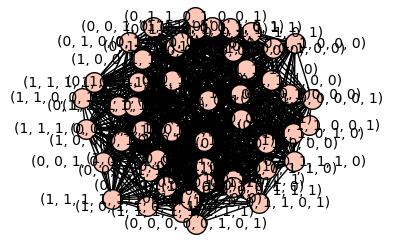

number of veritces:  51
clique: 7
independent set :  3


In [3]:
from sage.graphs.independent_sets import IndependentSets

Im = IndependentSets(G, maximal=True)
maximals = [x for i,x in enumerate(Im)]


p = MixedIntegerLinearProgram()
T = p.new_variable(binary=True)
p.set_objective(p.sum(T[i] for i in G.vertices()))

for m in maximals:
    p.add_constraint(p.sum(T[i] for i in m) <= 3)


    
# Set Objective: 
print(round(p.solve()))
p.get_values(T)
T = p.get_values(T)


G_subgraph = G.copy()
for i in range(len(G.vertices())):
    if T[Vertex[i]] == 0:
        G_subgraph.delete_vertex(Vertex[i])
    

        
Subgraph_Vertex = [x for i,x in enumerate(G_subgraph.vertices())]




G_subgraph.show()

    
        
print("number of veritces: " ,len(G_subgraph.vertices()))
print("clique:", G_subgraph.clique_number())
print("independent set : " , len(G_subgraph.independent_set()))



17.0


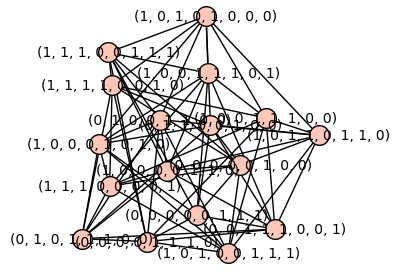

3
3


In [4]:
G_comp = G_subgraph.complement()
p = MixedIntegerLinearProgram()
T = p.new_variable(binary=True)
p.set_objective(p.sum(T[i] for i in G_comp.vertices()))
Im = IndependentSets(G_comp, maximal=True)
maximals = [x for i,x in enumerate(Im)]

for m in maximals:
    p.add_constraint(p.sum(T[i] for i in m) <= 3)

print(round(p.solve()))
p.get_values(T)
T = p.get_values(T)


G_subgraph_comp = G_comp.copy()
for i in range(len(G_comp.vertices())):
    if T[Subgraph_Vertex[i]] == 0:
        G_subgraph_comp.delete_vertex(Subgraph_Vertex[i])
    

G_subgraph_comp.show()
print(G_subgraph_comp.clique_number())
print(len(G_subgraph_comp.independent_set()))